In [1]:
import numpy as np
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)
from numpy.random import seed
seed(123)

2.7.0
2.7.0


# Zad
Porównaj wyniki działań różnych optymalizacji
* 
```python
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
```
* 
```python
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
```
* 
```python
RMSprop = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
```
* 
```python
Adagrad = keras.optimizers.Adagrad(learning_rate=0.01)
```
* 
```python
Adadelta = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```

https://keras.io/optimizers/

In [2]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/var/folders/3t/bh3b870n50l8_xwgnc5hdq900000gn/T/ipykernel_40174/357239312.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
/var/folders/3t/bh3b870n50l8_xwgnc5hdq900000gn/T/ipykernel_40174/357239312.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:




dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
X_test.shape

(30162, 41)


(15060, 41)

# SGD

In [4]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_sgd = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


2022-05-27 14:41:46.085914: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-27 14:41:46.086399: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

/Users/jakubstepien/miniforge3/envs/env_tf/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [7]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=5, callbacks=[history_sgd])

Epoch 1/5
943/943 [==============================] - ETA: 0s - loss: 0.4049 - accuracy: 0.8031

2022-05-27 14:42:07.767949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - 6s 7ms/step - loss: 0.4049 - accuracy: 0.8031 - val_loss: 0.3563 - val_accuracy: 0.8287
Epoch 2/5
943/943 [==============================] - 6s 7ms/step - loss: 0.3410 - accuracy: 0.8385 - val_loss: 0.3386 - val_accuracy: 0.8430
Epoch 3/5
943/943 [==============================] - 6s 7ms/step - loss: 0.3342 - accuracy: 0.8430 - val_loss: 0.3319 - val_accuracy: 0.8452
Epoch 4/5
943/943 [==============================] - 6s 7ms/step - loss: 0.3312 - accuracy: 0.8453 - val_loss: 0.3308 - val_accuracy: 0.8438
Epoch 5/5
943/943 [==============================] - 6s 7ms/step - loss: 0.3293 - accuracy: 0.8448 - val_loss: 0.3304 - val_accuracy: 0.8448


In [8]:
history_sgd.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

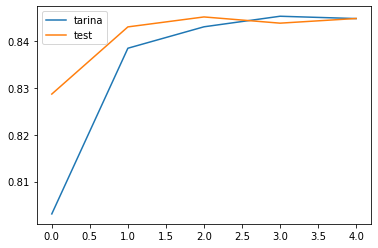

In [9]:
import matplotlib.pyplot as plt
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

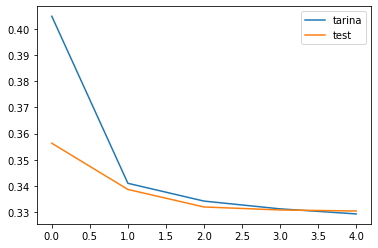

In [10]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['loss'], label = "tarina")
plt.plot(history_sgd.history['val_loss'], label = "test")
plt.legend()
plt.show()

# RMSprop

In [18]:
from keras.callbacks import History

def createModel(optimizer):
    history = History()
    model = Sequential()
    model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
    model.add(Dense(50,activation="sigmoid"))
    model.add(Dense(10,activation="sigmoid"))
    model.add(Dense(1,activation="sigmoid"))
    model.summary()
    
    model.compile(loss="binary_crossentropy",optimizer=optimizer, metrics=["accuracy"])
    
    model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=5, callbacks=[history])
    
    plt.plot(history.history['accuracy'], label = "tarina")
    plt.plot(history.history['val_accuracy'], label = "test")
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label = "tarina")
    plt.plot(history.history['val_loss'], label = "test")
    plt.legend()
    plt.show()
    
    return model

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 100)               4200      
                                                                 
 dense_25 (Dense)            (None, 50)                5050      
                                                                 
 dense_26 (Dense)            (None, 10)                510       
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


2022-05-27 14:55:09.136399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - ETA: 0s - loss: 0.4195 - accuracy: 0.8097

2022-05-27 14:55:16.554659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - 9s 9ms/step - loss: 0.4195 - accuracy: 0.8097 - val_loss: 0.3473 - val_accuracy: 0.8439
Epoch 2/5
943/943 [==============================] - 7s 8ms/step - loss: 0.3398 - accuracy: 0.8439 - val_loss: 0.3378 - val_accuracy: 0.8465
Epoch 3/5
943/943 [==============================] - 7s 8ms/step - loss: 0.3330 - accuracy: 0.8468 - val_loss: 0.3372 - val_accuracy: 0.8467
Epoch 4/5
943/943 [==============================] - 7s 8ms/step - loss: 0.3292 - accuracy: 0.8484 - val_loss: 0.3311 - val_accuracy: 0.8474
Epoch 5/5
943/943 [==============================] - 8s 8ms/step - loss: 0.3270 - accuracy: 0.8493 - val_loss: 0.3299 - val_accuracy: 0.8460


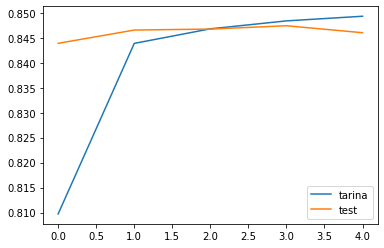

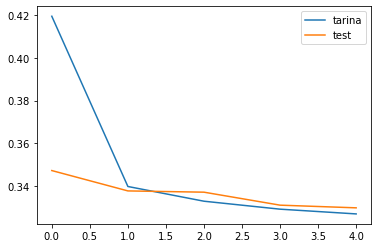

In [19]:
RMSprop = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

model = createModel(RMSprop)

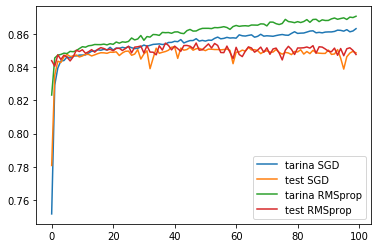

# Adagrad

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4200      
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 10)                510       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


2022-05-27 14:48:59.930008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - ETA: 0s - loss: 0.5806 - accuracy: 0.7268

2022-05-27 14:49:05.452814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - 7s 7ms/step - loss: 0.5806 - accuracy: 0.7268 - val_loss: 0.5544 - val_accuracy: 0.7543
Epoch 2/5
943/943 [==============================] - 7s 7ms/step - loss: 0.5560 - accuracy: 0.7511 - val_loss: 0.5499 - val_accuracy: 0.7543
Epoch 3/5
943/943 [==============================] - 6s 7ms/step - loss: 0.5491 - accuracy: 0.7511 - val_loss: 0.5400 - val_accuracy: 0.7543
Epoch 4/5
943/943 [==============================] - 6s 7ms/step - loss: 0.5321 - accuracy: 0.7511 - val_loss: 0.5139 - val_accuracy: 0.7543
Epoch 5/5
943/943 [==============================] - 6s 7ms/step - loss: 0.4903 - accuracy: 0.7525 - val_loss: 0.4574 - val_accuracy: 0.7657


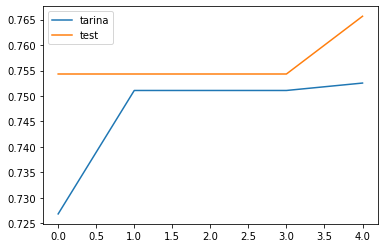

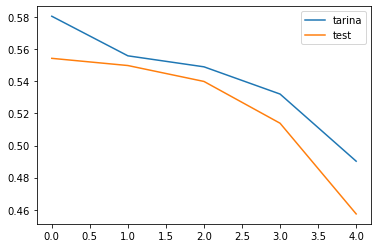

In [14]:
Adagrad = keras.optimizers.Adagrad(learning_rate=0.01)

model = createModel(Adagrad)

# Adadelta

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               4200      
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 10)                510       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


2022-05-27 14:49:32.714518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - ETA: 0s - loss: 0.4743 - accuracy: 0.7821

2022-05-27 14:49:38.043156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - 7s 7ms/step - loss: 0.4743 - accuracy: 0.7821 - val_loss: 0.3549 - val_accuracy: 0.8410
Epoch 2/5
943/943 [==============================] - 6s 7ms/step - loss: 0.3430 - accuracy: 0.8419 - val_loss: 0.3357 - val_accuracy: 0.8452
Epoch 3/5
943/943 [==============================] - 6s 7ms/step - loss: 0.3323 - accuracy: 0.8462 - val_loss: 0.3312 - val_accuracy: 0.8477
Epoch 4/5
943/943 [==============================] - 7s 7ms/step - loss: 0.3284 - accuracy: 0.8463 - val_loss: 0.3283 - val_accuracy: 0.8469
Epoch 5/5
943/943 [==============================] - 6s 7ms/step - loss: 0.3256 - accuracy: 0.8488 - val_loss: 0.3255 - val_accuracy: 0.8454


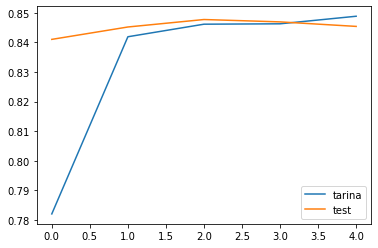

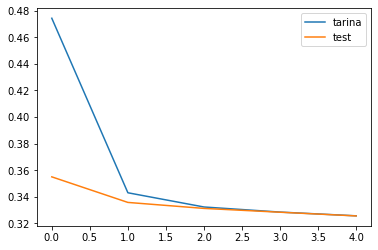

In [15]:
Adadelta = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)

model = createModel(Adadelta)

# Adam

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               4200      
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 dense_18 (Dense)            (None, 10)                510       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
 10/943 [..............................] - ETA: 5s - loss: 0.9712 - accuracy: 0.2344  

2022-05-27 14:50:05.808812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


941/943 [============================>.] - ETA: 0s - loss: 0.4489 - accuracy: 0.7956

2022-05-27 14:50:11.346913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - 7s 7ms/step - loss: 0.4487 - accuracy: 0.7957 - val_loss: 0.3550 - val_accuracy: 0.8412
Epoch 2/5
943/943 [==============================] - 7s 7ms/step - loss: 0.3427 - accuracy: 0.8444 - val_loss: 0.3370 - val_accuracy: 0.8453
Epoch 3/5
943/943 [==============================] - 7s 7ms/step - loss: 0.3303 - accuracy: 0.8482 - val_loss: 0.3306 - val_accuracy: 0.8485
Epoch 4/5
943/943 [==============================] - 7s 7ms/step - loss: 0.3251 - accuracy: 0.8488 - val_loss: 0.3280 - val_accuracy: 0.8489
Epoch 5/5
943/943 [==============================] - 7s 7ms/step - loss: 0.3215 - accuracy: 0.8522 - val_loss: 0.3238 - val_accuracy: 0.8495


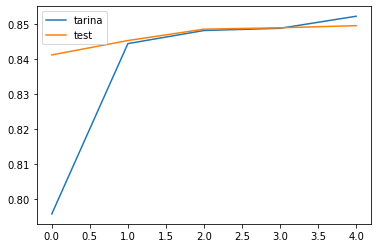

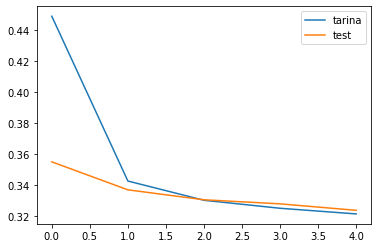

In [16]:
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model = createModel(Adam)

# Adam

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               4200      
                                                                 
 dense_21 (Dense)            (None, 50)                5050      
                                                                 
 dense_22 (Dense)            (None, 10)                510       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
  9/943 [..............................] - ETA: 6s - loss: 1.0460 - accuracy: 0.2569  

2022-05-27 14:50:40.560459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


942/943 [============================>.] - ETA: 0s - loss: 0.6848 - accuracy: 0.5895

2022-05-27 14:50:46.239268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - 7s 7ms/step - loss: 0.6847 - accuracy: 0.5896 - val_loss: 0.5783 - val_accuracy: 0.7543
Epoch 2/5
943/943 [==============================] - 7s 8ms/step - loss: 0.5600 - accuracy: 0.7511 - val_loss: 0.5376 - val_accuracy: 0.7543
Epoch 3/5
943/943 [==============================] - 7s 7ms/step - loss: 0.4952 - accuracy: 0.7857 - val_loss: 0.4476 - val_accuracy: 0.8331
Epoch 4/5
943/943 [==============================] - 7s 7ms/step - loss: 0.4216 - accuracy: 0.8350 - val_loss: 0.4030 - val_accuracy: 0.8358
Epoch 5/5
943/943 [==============================] - 7s 7ms/step - loss: 0.3922 - accuracy: 0.8369 - val_loss: 0.3831 - val_accuracy: 0.8387


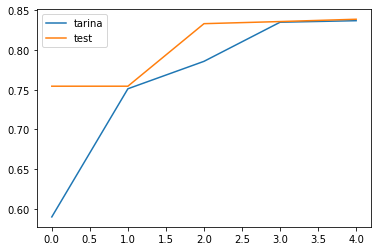

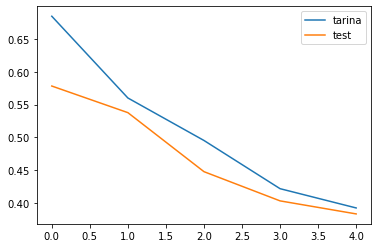

In [17]:
Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model = createModel(Adam)